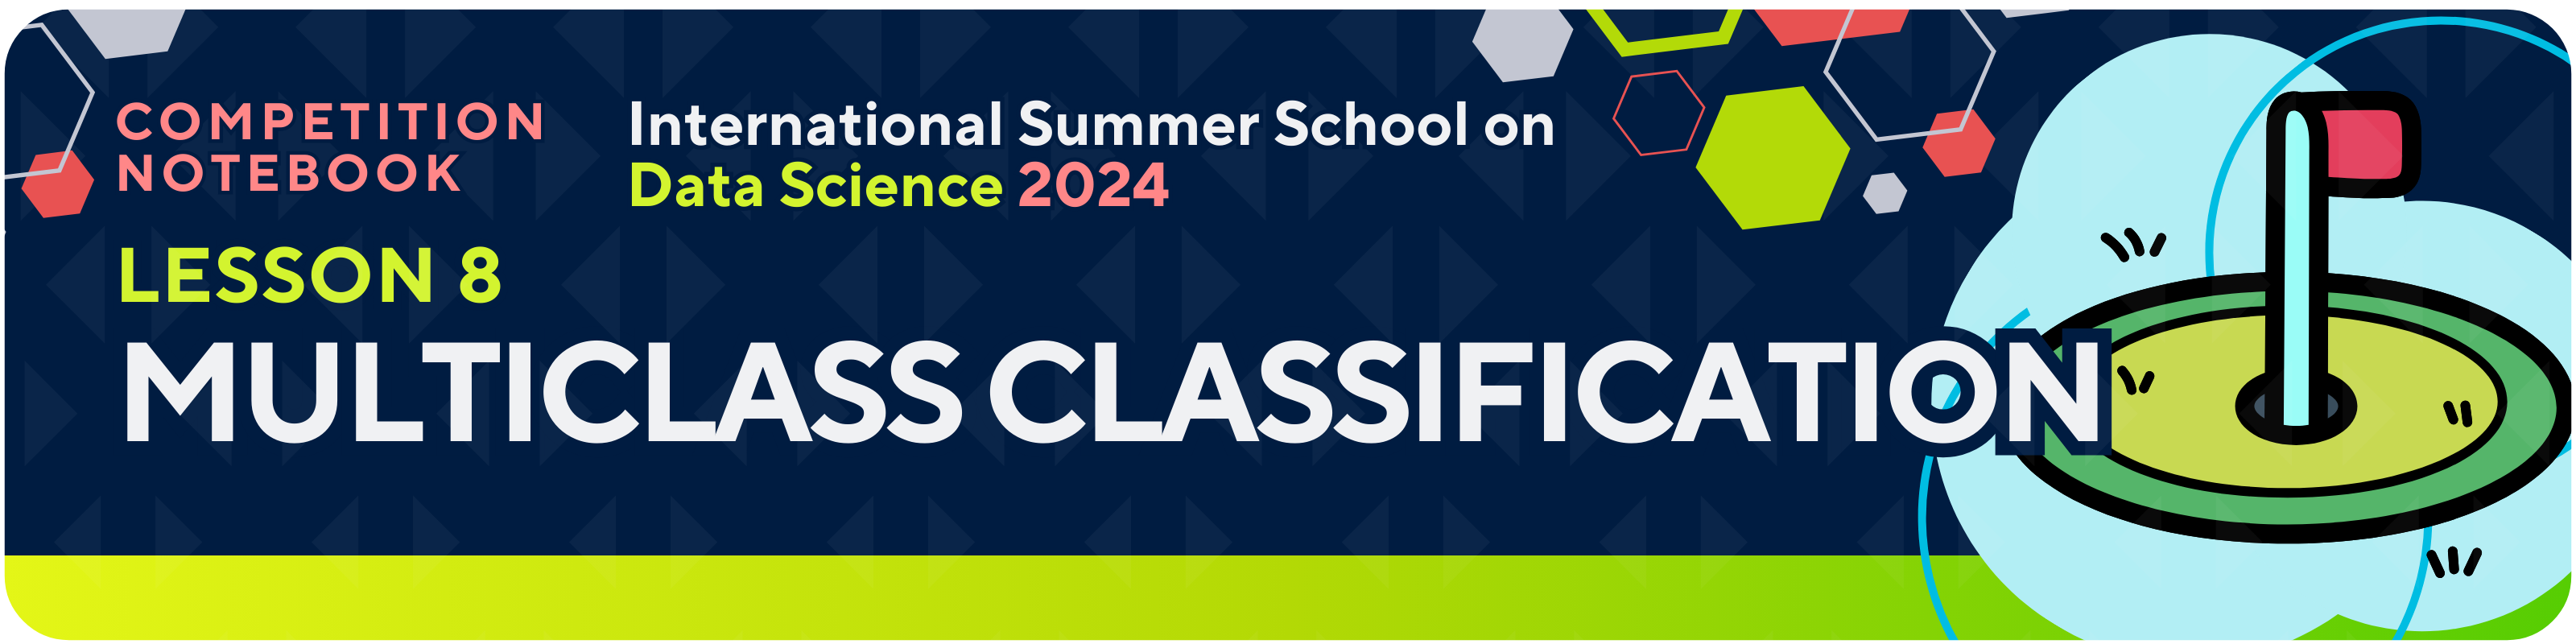

## **🎯      Goal**

Based on weather conditions of a day, predict the outlook for the next day from the following categories:

| | | |
|---|---|---|
| 1. Partly Cloudy | 5. Frosty | 9. Hot and Humid |
| 2. Clear | 6. Windy | 10. Frigid |
| 3. Rainy | 7. Snowy | 11. Hot |
| 4. Mostly Cloudy | 8. Frigid and Windy | |

<img src="https://i.imgur.com/kXPqSaN.png" width=1200 />

## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**


In [ ]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PREPROCESSING
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.pipeline       import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

# MODELING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy           import DummyClassifier

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load Training Dataset**



In [ ]:
# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID')

df_train

,Temperature,ChanceOfRain,AtmosphericPressure,WindSpeed,Evaporation,WindDirection,Humidity,CloudCover,Precipitation,Visibility,...,GroundTemperature,RelativeHumidity,AtmosphericStability,TotalRainfall,MaxWindSpeed,SoilAcidity,SunshineDuration,WaterTableDepth,PollutionIndex,OutlookTomorrow
DateID,,,,,,,,,,,,,,,,,,,,,
1e960be1,7.69,0.00,1014.798612,6.126583,8.068585,302.157446,49.112776,21.069125,0.772750,2.561954,...,7.046449,31.990219,-1.695787,1.579189,4.583106,5.906417,4.064026,1.246958,3.137151,Clear
c84fcace,5.93,0.00,1017.762303,4.846304,6.732378,160.377914,46.081440,32.555424,1.929129,2.042223,...,15.530465,30.658733,-1.688540,2.287353,6.608744,6.245393,6.057516,1.111087,5.787248,Clear
05177045,20.24,0.00,1016.636281,6.562731,13.175343,299.492309,64.965126,9.016805,0.385509,1.603320,...,18.977774,50.635293,-1.097027,0.809200,12.770087,6.432612,4.132329,1.324384,3.837162,Clear
71e3fbae,3.55,0.17,1013.405035,7.433833,5.751096,85.091412,46.708296,26.275019,2.165660,1.739004,...,0.538413,28.799192,-0.770715,2.165224,6.832427,6.426928,3.876124,1.717747,5.255070,Partly Cloudy
7f1fb6bd,7.72,0.52,1020.461648,6.381662,8.661488,296.799640,60.122660,73.370469,7.001796,0.977598,...,19.995968,35.741050,0.807195,6.888723,18.461884,7.111438,9.248907,2.847537,3.483750,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9186414a,-0.54,0.00,1031.960157,1.046049,5.361030,242.105657,35.361804,71.943161,4.236044,1.652075,...,16.839566,19.895769,-0.448789,5.111818,12.367552,6.563868,9.538907,1.743359,6.254691,Mostly Cloudy
e2c73237,7.83,0.00,1024.582514,2.592295,8.746507,337.889917,53.551495,43.117224,2.820081,1.828067,...,17.285697,34.816451,-0.560188,2.184429,8.612971,6.461338,6.688841,1.631018,10.866800,Rainy
f9b1c180,20.40,0.00,1016.129408,5.176983,9.870765,10.214186,63.558897,31.718243,1.304709,1.827712,...,23.200830,48.149724,-1.684344,1.731306,2.692832,6.394721,5.880391,1.444434,8.083423,Clear



## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



(array([144., 152.,  76.,  90.,  66.,  60.,  30.,  42.,  28.,  81.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

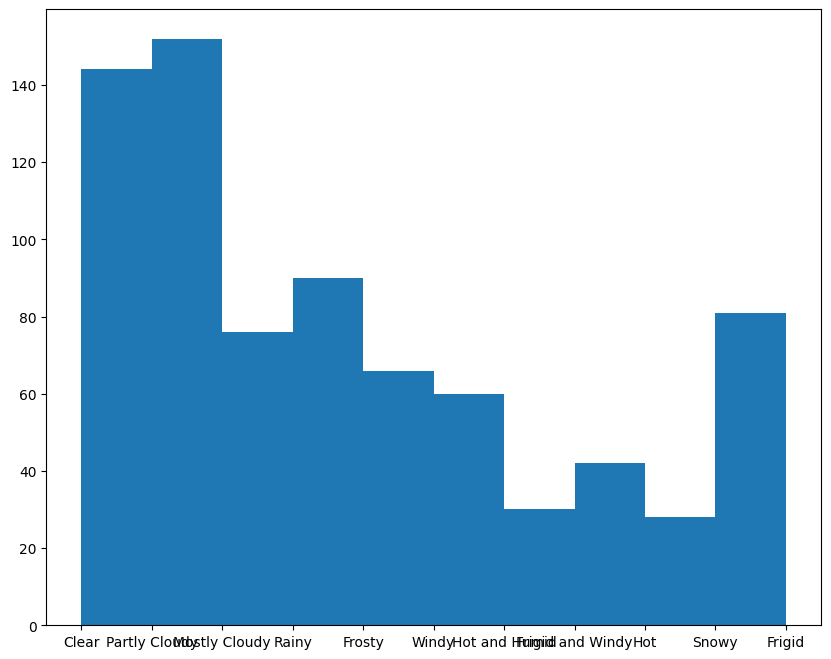

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df_train['OutlookTomorrow'])

In [ ]:
!pip install category_encoders

In [ ]:
# SET FEATURE MATRIX & TARGET VARIABLE
from category_encoders import TargetEncoder

target_col = 'OutlookTomorrow'
X_train, y_train = df_train.drop(columns=target_col), df_train[target_col]

# Encode the categorical target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# Identify categorical columns (you may need to adjust these based on your dataset)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# 1. Apply Target Encoding on categorical columns
target_encoder = TargetEncoder(cols=categorical_cols)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# 2. Alternatively, Apply Frequency Encoding (if you prefer this)
# For frequency encoding, we compute the frequency of each category
# for col in categorical_cols:
#     freq_encoding = X_train[col].value_counts(normalize=True)
#     X_train_encoded[col] = X_train[col].map(freq_encoding)


pd.Series(y_train)

,0
0,0
1,0
2,0
3,7
4,6
...,...
764,6
765,8
766,0
767,7



## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore Data**


In [ ]:
print(df_train.info())
print(pd.Series(encoder.inverse_transform(y_train)).value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 1e960be1 to 25e63288
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           769 non-null    float64
 1   ChanceOfRain          769 non-null    float64
 2   AtmosphericPressure   769 non-null    float64
 3   WindSpeed             769 non-null    float64
 4   Evaporation           769 non-null    float64
 5   WindDirection         769 non-null    float64
 6   Humidity              769 non-null    float64
 7   CloudCover            769 non-null    float64
 8   Precipitation         769 non-null    float64
 9   Visibility            769 non-null    float64
 10  DewPoint              769 non-null    float64
 11  UVIndex               769 non-null    int64  
 12  WindGusts             769 non-null    float64
 13  LightningStrikes      769 non-null    int64  
 14  AirQualityIndex       769 non-null    float64
 15  SolarRadiation  


## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Preprocessor**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
], remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max', MinMaxScaler(),
                                 Index(['Temperature', 'ChanceOfRain', 'AtmosphericPressure', 'WindSpeed',
       'Evaporation', 'WindDirection', 'Humidity', 'CloudCover',
       'Precipitation', 'Visibility', 'DewPoint', 'UVIndex', 'WindGusts',
       'LightningStrikes', 'AirQualityIndex', 'SolarRadiation', 'SoilMoisture',
       'BarometricTrend', 'GrassGrowth', 'FrostOccurrence',
       'LeafWetnessDuration', 'SolarNoonTime', 'AirTempVariation',
       'GroundTemperature', 'RelativeHumidity', 'AtmosphericStability',
       'TotalRainfall', 'MaxWindSpeed', 'SoilAcidity', 'SunshineDuration',
       'WaterTableDepth', 'PollutionIndex'],
      dtype='object'))])


## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Training Pipeline**



In [ ]:
# # MAKE A TRAINING PIPELINE
# training_pipeline = make_pipeline(
#     preprocessor,
#     DummyClassifier(strategy='stratified', random_state=42)
# )

# training_pipeline

In [ ]:
from imblearn.combine import SMOTEENN  # Importing SMOTEENN from imbalanced-learn
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

from imblearn.pipeline import Pipeline as ImbPipeline  # To use SMOTEENN within a pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# # CREATE A RANDOM FOREST CLASSIFIER (You can replace this with any model)
# clf = RandomForestClassifier(random_state=42, n_estimators=100)
# xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgbm_clf = LGBMClassifier(random_state=42)



# # CREATE A PIPELINE WITH SMOTEENN (Oversampling + Cleaning), PREPROCESSOR, AND RANDOM FOREST
# training_pipeline = ImbPipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('smoteenn', SMOTEENN(random_state=42)),  # SMOTEENN for oversampling + cleaning
#         ('classifier', clf)
#     ]
# )
# Create a pipeline using SMOTEENN and XGBoost
# xgb_pipeline = ImbPipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('smoteenn', SMOTEENN(random_state=42)),
#         ('classifier', xgb_clf)
#     ]
# )
# Create a pipeline using SMOTEENN and LightGBM
lgbm_pipeline = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('classifier', lgbm_clf)
    ]
)
# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)

# cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

# print(f"Cross-Validation Accuracy: {cross_val_score.mean():.4f}")



## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**



In [ ]:
# # DEFINE PARAMETER DISTRIBUTIONS
# # param_dist = {
# #     'dummyclassifier__random_state': np.arange(1, 300),
# # }
# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {
#     'classifier__n_estimators': [50, 100, 200],
#     'classifier__max_depth': [10, 20, None],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

lgbm_param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 10, -1],  # -1 means no limit
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__num_leaves': [31, 50, 100],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0],
    'classifier__min_child_samples': [20, 50, 100]
}



# PERFORM RANDOM SEARCH WITH THE CROSS VALIDOTION
random_search_lgbm = RandomizedSearchCV(estimator=lgbm_pipeline, param_distributions=lgbm_param_dist,
                                        cv=cv, n_iter=10, scoring='accuracy', random_state=260, n_jobs=-1)

random_search_lgbm.fit(X_train, y_train)
# # PRINT BEST PARAMETERS AND SCORE
# print("Best Parameters:")
# print(pd.Series(random_search.best_params_))
# print("\nBest Cross-Validation Accuracy:")
# print(f"{random_search.best_score_:.4} ± {2*np.std(random_search.cv_results_['mean_test_score']):.4}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7887
[LightGBM] [Info] Number of data points in the train set: 919, number of used features: 32
[LightGBM] [Info] Start training from score -4.050697
[LightGBM] [Info] Start training from score -2.078354
[LightGBM] [Info] Start training from score -2.238319
[LightGBM] [Info] Start training from score -2.208166
[LightGBM] [Info] Start training from score -1.955752
[LightGBM] [Info] Start training from score -1.940484
[LightGBM] [Info] Start training from score -2.392469
[LightGBM] [Info] Start training from score -4.743845
[LightGBM] [Info] Start training from score -3.212368
[LightGBM] [Info] Start training from score -2.011102
[LightGBM] [Info] Start training from score -2.505798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('min_max',
                                                                               MinMaxScaler(),
                                                                               Index(['Temperature', 'ChanceOfRain', 'AtmosphericPressure', 'WindSpeed',
       'Evaporation', 'WindDirection', 'Humidity', 'CloudCover',
       'Precipitation', 'Vis...
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.7,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [3, 6, 10, -1],
                                        'classifier__min_child_samples': [20,
                                                                          50,
                                                                          100],
                                        'classifier__n_estimators': [50, 100,
                                                                     200],
                                        'classifier__num_leaves': [31, 50, 100],
                                        'classifier__subsample': [0.7, 0.8,
                                                                  1.0]},
                   random_state=260, scoring='accuracy')


## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
# SAVE & FIT BEST MODEL
# best_model = random_search.best_estimator_
# best_model.fit(X_train, y_train)
best_lgbm_model = random_search_lgbm.best_estimator_
best_lgbm_params = random_search_lgbm.best_params_
best_lgbm_accuracy = random_search_lgbm.best_score_


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load the Testset & Predict**



In [ ]:
# LOAD THE TEST DATASET
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# SET FEATURE MATRIX (no Target Variable)
target_col = 'OutlookTomorrow'
X_test = df_test

# PREDICT THE TEST DATA
y_pred = best_lgbm_model.predict(X_test)

# INVERSE LABEL ENCODING
y_pred = encoder.inverse_transform(y_pred)

pd.Series(y_pred)

,0
0,Mostly Cloudy
1,Rainy
2,Windy
3,Frigid
4,Hot
...,...
725,Frigid
726,Mostly Cloudy
727,Rainy
728,Snowy



## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# CONVERT PREDICTION INTO DATAFRAME
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# WRITE A CSV FILE FOR SUBMISSION
submission.to_csv('submission.csv')

submission

,OutlookTomorrow
DateID,
fe97c2d8,Mostly Cloudy
be33fd88,Rainy
824bae96,Windy
6589fc6c,Frigid
5d837fb0,Hot
...,...
c35ee3f9,Frigid
3d1d573a,Mostly Cloudy
338db194,Rainy


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>